# Logistic Regression

### Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

### In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

## Sigmoid Function: $F(z) = \frac{1}{1 + exp(-z)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def plot_sigmoid():
    x = np.linspace(-5, 5, 100)
    plt.figure(figsize=(5,5))
    plt.plot(x, sigmoid(x), lw=2, c="navy", label="Sigmoid")
    plt.axhline(0.5, lw=2, ls="--", c="red", label="Decision Bound")
    plt.title("Sigmoid Function")
    plt.grid(True)
    plt.legend(loc=0)
    plt.xlabel("x")
    plt.ylabel("Sigmoid(x)")
    plt.plot()

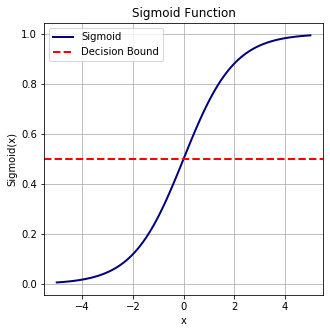

In [2]:
plot_sigmoid()

## The main algorithm to develop Logistic Regression is based on updating weights using Gradient Descent approach iteratively.
### - Define linear model: $z = wx + b$
### - Define prediction: $\hat{y} = sigmoid(z) = sigmoid(wx + b) = \frac{1}{1 + \exp({-(wx+b)})}$
### - Update weights: $w = w - lr \times dw$ where $dw = \frac{1}{N} \Sigma_{i=1}^{N}(2x_i(\hat{y_i} - y_i))$
### - Update bias $b = b - lr \times db$ where $db = \frac{1}{N} \Sigma_{i=1}^{N}(\hat{y_i} - y_i)$

### Now, let's see how this works

In [3]:
# change the directory
%cd ..

/home/amirhessam/Documents/GitHub/ml-algs


In [4]:
# loading libraries
from mlalgs.logistic_regression import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Sample breast cancer data for binary classification task. I have used stratifed train/test splits where test size is the 20\% of the data.

In [5]:
# loading data
data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1367,
                                                    stratify=y)

### Now, train the model using our algorithm.

In [6]:
# define model
clf = LogisticRegression()
# train model
clf.fit(X_train, y_train)
# predicted class
y_pred = clf.predict(X_test)
# predicted proba
y_pred_proba = clf.predict_proba(X_test)

In [7]:
# accuracy
accuracy_score(y_test, y_pred)

0.9298245614035088

### We can also plot the decision boundary and the predicted probabilities in each class.

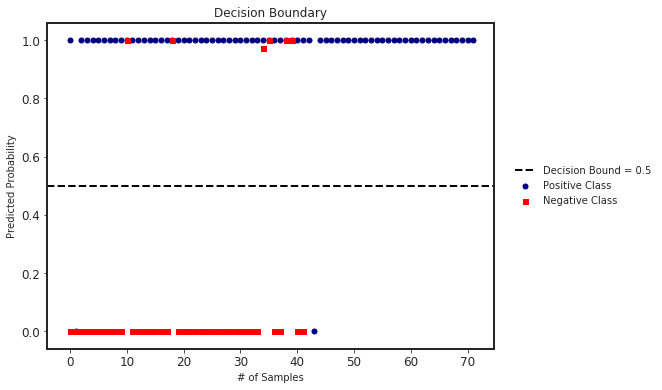

In [8]:
clf.plot_decision_boundary(X_test, y_test)

### We can also calculate all the binary classification metrics using SlickML library.

In [ ]:
# install slickml
!pip install slickml

In [10]:
# loading BinaryClassificationMetrics
from slickml.metrics import BinaryClassificationMetrics

In [11]:
# initialize the metric object
clf_metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.930000,0.915000,0.946000,0.969000,0.921000,0.972000,0.943000,0.946000,0.962000,0.931000,0.897000,70,36,6,2


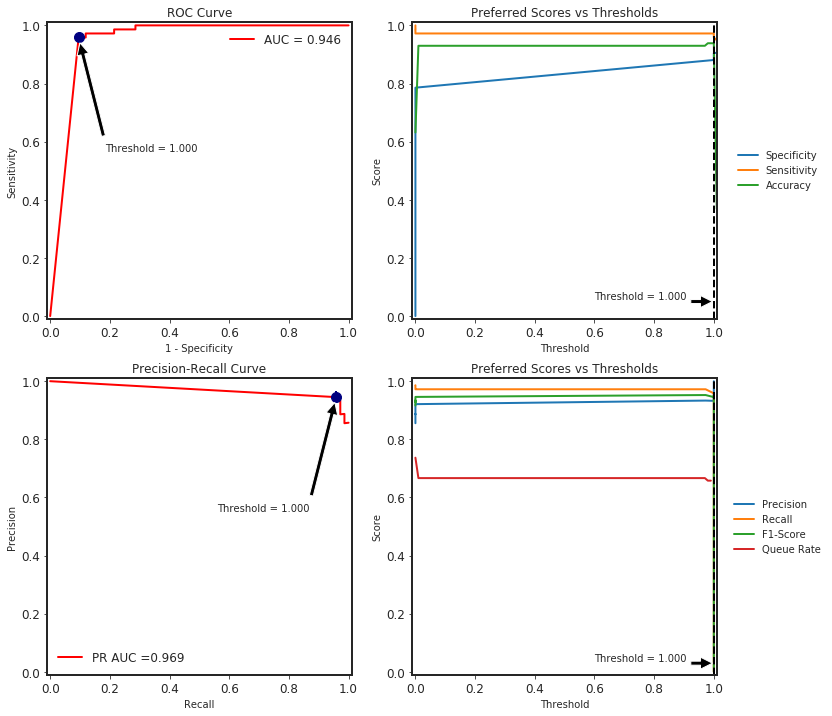

In [12]:
# plot roc, precision-recall with different thresholds calculations
clf_metrics.plot()